In this tutorial we present an example of solving the bin packing problem. The example is divided into three sections:  Reading input data, applying a heuristic and printing the output.  

Let's start by decribing the state. A state consists of a number of bins, boxes in the bins and unused boxes. Also, the state contains the total covered and uncoverd points.  
Applying a bin packing algorithm to a state transforms a state to a new condition.  
The following example shows a state that contains a single bin of 6x6 dimensions. In this bin 5 boxes are packed and they cover an area of 25 points leaving 11 uncovered points.  
  
Bin number: 1  
Total uncovered points: 11  
Total covered points: 25  
Number of boxes: 5  
Unused boxes: 0  
Runtime: 0.22507309913635254  
  
Bin size:  
6 6  

<img src="blob/main/state.PNG" width="200" />

These states are saved in text files, and in the following we describe the structure of input files and I/O functions.  
  
**Reading input data**  
The input file has the following structure:
The first line contains two integers *bin_width* and *bin_height* representing the bin dimensions.
This is followed by *n* lines *(1<=n)* indicating that there are *n* boxes, each line containing two integers *box_width* and *box_height* representing each box dimensions.
The *n* lines can also contain the following 5 integers: 
*box_width*, *box_height*, *box_x*, *box_y*, *bin_id*.
An example is the following input file called *test_input* which exists in the folder *test_instances*:  
10 10  
2 2  
3 4  
4 6  
5 5  
6 7  
  
The previous example means that we have a bin of size (10,10) and five boxes of the sizes [(2,2),(3,4),(4,6),(5,5),(6,7)].
To read this input state, we use the function *read_state* which is defined in the class *ReadWrite*. This function takes as input the file path *test_input*. The returned state will be saved in the instance 'state'.  
  

![alt text](pics/state.png)
![alt text](state.png)

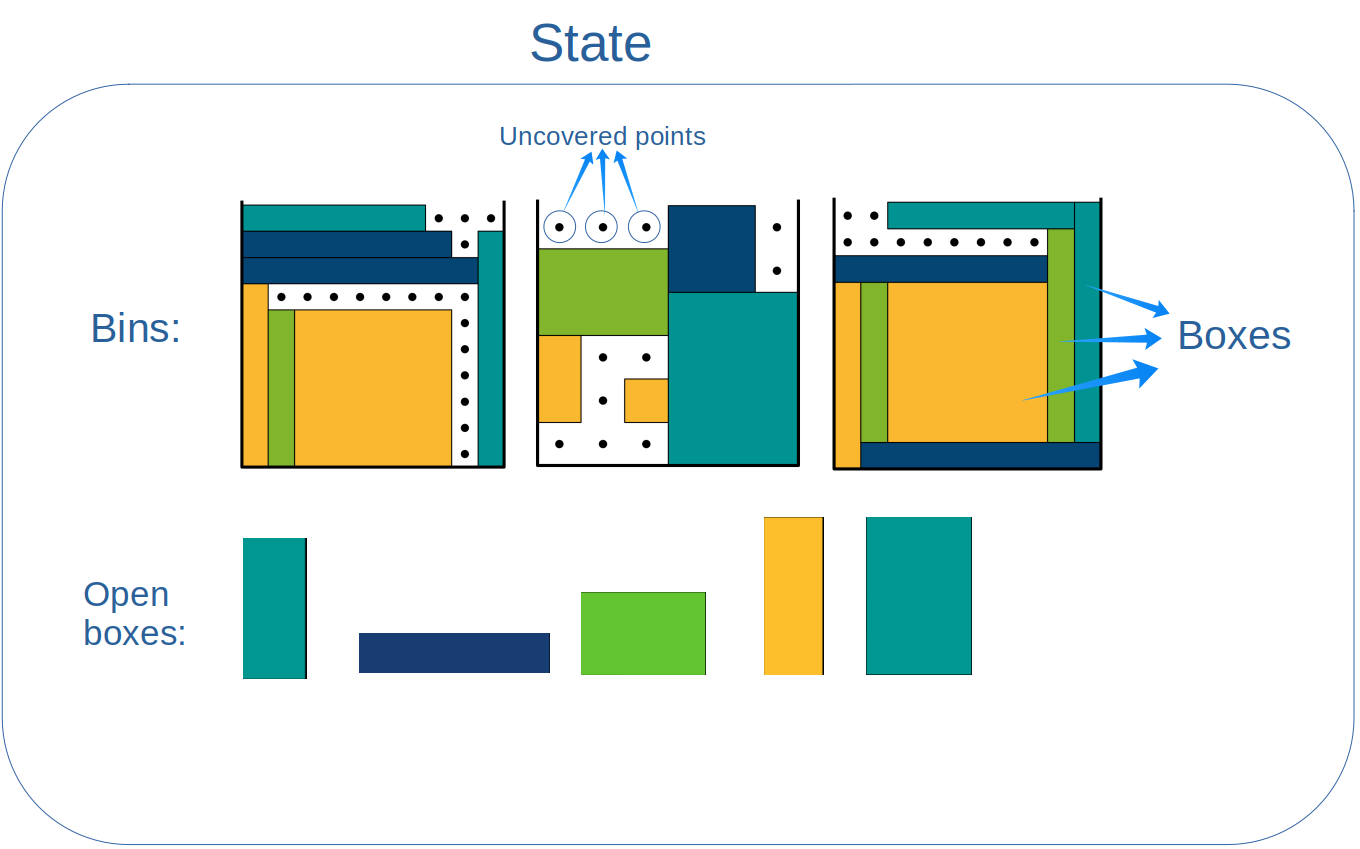

In [ ]:
import Base.bp2DState
from Base.bp2DSimpleHeuristics import single_type_heuristic, first_fit, next_fit, most_enclosed_position, max_rest, \
    best_fit, first_fit_decreasing, next_fit_decreasing, get_all_heuristics, random_fit
from Base.bp2DState import State
from Base.bpReadWrite import ReadWrite
from Base.bp2DBox import Box
from Base.bpStateGenerators import random_state_generator, state_generator

In [ ]:
state = ReadWrite.read_state("test_instances/test_3_input")

We could also generate a new state by giving the boxes explicitely as in the following example: 

In [ ]:
state_generator(path="test_instances/state_small", bin_size=(10, 9),
box_list=[(1, (1, 10)), (1, (1, 9)), (1, (9, 1)), (1, (1, 8)), (1, (8, 1)),
(1, (1, 7)), (1, (7, 1)), (1, (1, 6)), (1, (6, 6))], seed=10)

After reading the input, the initial state now is ready to apply a bin packing algorithm on. 

Note: environment... how to run ... setup .... jupiter notebook run.... run code here.

**Applying a heuristic**  

The second step is applying a packing heuristic to our state in order to solve the bin packing problem. We execute the *single_type_heuristic* function and assign the value True to the arguement *plot_result* to trigger the *plot_packing_state* function.   The *single_type_heuristic* function is defined and used as follows:  

In [ ]:
def single_type_heuristic(state: State, heuristic_step=random_fit, plot_result=False, plot_steps=False, plot_name=None):
    single_type_heuristic(state,plot_result=True)  

Some simple heuristics are implemented in the bp2DSimpleHeuristics.py file such as *best_fit*, *max_rest*, *random_fit*, *next_fit* and *first_fit*. Also, we can sort the boxes in a state using *sort_boxes_in_state* function.  
Applying the heuristic results in a new state, and the following section shows how the outputs are written in the result file.  
  

**Outputting the solution**

The output state is saved in a text file by applying the function *write_state* and specifing the name of the output file.

In [ ]:
ReadWrite.write_state(path=f"test_instances/solution_big", state=state)

The output file contains the state of the  bin packing problem, as follows:  
State of a bin packing problem:  
 
Bin number: 1  
Total uncovered points: 11  
Total covered points: 25  
Number of boxes: 5  
Unused boxes: 0  
Runtime: 0.22507309913635254  
  
Bin size:  
6 6  
  
Boxes (width, height) not in some bins:  
  
Boxes (width, height, x_position, y_position, bin_id) in bins:  
3 2 0 3 0  
3 4 3 0 0  
1 2 0 1 0  
1 1 0 0 0  
2 2 1 0 0  
  
The x_position and y_position in the output file indicate the bottom left corner of the corresponding box.


In order to illustrate the solution, the plot function outputs an image saved in the vis folder.  
The following figure shows the packing solution that corresponds to the previous output file.  


![alt text](pics/plot.png)

You can also check the validation of the solution state by applying *is_valid* function. This function verifies whether any open boxes are still without packing, checks for any ovrelapping between the packed boxes, compares the original state with the solution state and returns true if the solution is valid, otherwise it returns false. 

# Requirements:


To install the necessary requirements, we provide a environment.yml file that can be used with [anaconda](https://anaconda.org/). Of course you can use any other means of installing the requirements listed in this file. 

The required packages are:  
```matplotlib=3.4.2```  
```numpy=1.20.3```  
The code could run using older versions as well.

## Conda Environment 

To create an environment ```autumn2021``` with the required packages, run the following command:  

```conda env create -f environment.yml```  

To activate the environment and start coding, run:

```conda activate autumn2021```

## Jupyter Notebook

If you like to run a jupyter notebook server, just as we did, you may need to install it in your current (conda) environment.

The classic Jupyter Notebook can be installed with conda:  
```conda install -c conda-forge notebook```

If you use pip, you can install it with:  
```pip install notebook```

To run the notebook, run the following command at the Terminal:  
```jupyter notebook```


# A Large Example

And now some code that runs a whole bunch of heuristics

In [ ]:
import os

import Base.bp2DState
from Base.bp2DSimpleHeuristics import single_type_heuristic, first_fit, next_fit, most_enclosed_position, max_rest, \
    best_fit, first_fit_decreasing, next_fit_decreasing, get_all_heuristics, random_fit
from Base.bp2DState import State
from Base.bpReadWrite import ReadWrite
from Base.bp2DBox import Box
from Base.bpStateGenerators import random_state_generator, state_generator


def main():
    if not os.path.exists("./vis"):
        os.mkdir("./vis")

    # Simple examples for read and write
    state = ReadWrite.read_state(path="test_instances/test_1_input")
    ReadWrite.write_state(path="test_instances/test_1_output", state=state)
    single_type_heuristic(state, heuristic_step=first_fit_decreasing)
    ReadWrite.write_state(path="test_instances/test_1_solution", state=state)

    state = ReadWrite.read_state(path="test_instances/test_1_input")
    solution = ReadWrite.read_state(path="test_instances/test_1_solution")

    #
    # state = ReadWrite.read_state(path="test_instances/test_2_input")
    # ReadWrite.write_state(path="test_instances/test_2_output", state=state)
    # solution = single_type_heuristic(state, video=False)
    # ReadWrite.write_state(path="test_instances/test_2_solution", state=solution)
    #
    # state = ReadWrite.read_state(path="test_instances/test_3_input")
    # ReadWrite.write_state(path="test_instances/test_3_output", state=state)
    # solution = single_type_heuristic(state, video=False)
    # ReadWrite.write_state(path="test_instances/test_3_solution", state=solution)

    # Comparison of heuristics on small state with boxes explicitely given
    state_generator(path="test_instances/state_small", bin_size=(10, 10),
                    box_list=[(1, (1, 10)), (1, (1, 9)), (1, (9, 1)), (1, (1, 8)), (1, (8, 1)),
                              (1, (1, 7)), (1, (7, 1)), (1, (1, 6)), (1, (6, 6))], seed=10)
    for name, heuristic in get_all_heuristics():
        state = ReadWrite.read_state("test_instances/state_small")
        single_type_heuristic(state, heuristic, plot_result=True, plot_name=name)
        ReadWrite.write_state(path=f"test_instances/solution_small_{name}", state=state)

        state = ReadWrite.read_state("test_instances/state_random_big")
        solution = ReadWrite.read_state(path=f"test_instances/solution_big_{name}")
        print(f"Is solution of {name} valid? {solution.is_valid(state)}!")

    # Comparison of heuristics on random state
    random_state_generator(path="test_instances/state_random_big", bin_size=(10, 10), box_width_min=2,
                           box_num=1000)
    for name, heuristic in get_all_heuristics():
        state = ReadWrite.read_state("test_instances/state_random_big")
        single_type_heuristic(state, heuristic)
        ReadWrite.write_state(path=f"test_instances/solution_big_{name}", state=state)

        state = ReadWrite.read_state("test_instances/state_random_big")
        solution = ReadWrite.read_state(path=f"test_instances/solution_big_{name}")
        print(f"Is solution of {name} valid? {solution.is_valid(state)}!")

if __name__ == '__main__':
    main()